# Upper Confidence Bound BO


In [5]:
# Import the class
import torch
import yaml

## Customizing the UpperConfidenceBound Generator
First lets examine the possible options that we can specify for the
UpperConfidenceBound generator. We can use these keys to customize optimization.

In [6]:
from xopt.utils import get_generator_and_defaults
ucb_gen, ucb_options = get_generator_and_defaults("upper_confidence_bound")
print(yaml.dump(ucb_options.dict()))

acq:
  beta: 2.0
  monte_carlo_samples: 128
  proximal_lengthscales: null
  use_transformed_proximal_weights: true
model:
  use_conservative_prior_lengthscale: false
  use_conservative_prior_mean: false
  use_low_noise_prior: false
n_initial: 3
optim:
  max_travel_distances: null
  num_restarts: 5
  raw_samples: 20
  sequential: true
  use_nearby_initial_points: true



In [7]:
from xopt.resources.test_functions.rosenbrock import make_rosenbrock_vocs, evaluate_rosenbrock
from xopt import Xopt, Evaluator
import pandas as pd

vocs = make_rosenbrock_vocs(2)

generator_options = ucb_gen.default_options()
generator_options.optim.num_restarts = 20
generator_options.optim.max_travel_distances = [0.1, 0.1]
generator_options.acq.beta = 2.0
generator_options.model.use_low_noise_prior = True
#generator_options.acq.proximal_lengthscales = [0.01, 0.01]

evaluator = Evaluator(function=evaluate_rosenbrock)
generator = ucb_gen(vocs, generator_options)


C:\Users\Ryan Roussel\AppData\Local\Temp\ipykernel_14924\3113845684.py:14: DeprecationWarning: `copy_on_model_validation` should be a string: 'deep', 'shallow' or 'none'
  evaluator = Evaluator(function=evaluate_rosenbrock)


In [8]:
X = Xopt(generator=generator, evaluator=evaluator, vocs=vocs)

for i in range(100):
    X.step()
    print(f"step {i}: best: {X.data['y'].min()}")


step 0: best: 221.52468757700134
step 1: best: 221.52468757700134
step 2: best: 131.67458908454935
step 3: best: 50.62487408758039
step 4: best: 35.957773124392894
step 5: best: 2.2705132002169823
step 6: best: 2.2705132002169823
step 7: best: 1.9219966830687865
step 8: best: 1.9219966830687865
step 9: best: 1.4604521819037115
step 10: best: 1.4604521819037115
step 11: best: 1.4604521819037115
step 12: best: 1.4604521819037115
step 13: best: 1.4604521819037115
step 14: best: 0.5932324992862807
step 15: best: 0.5932324992862807
step 16: best: 0.5932324992862807
step 17: best: 0.5932324992862807
step 18: best: 0.5932324992862807
step 19: best: 0.5932324992862807
step 20: best: 0.5932324992862807
step 21: best: 0.5932324992862807
step 22: best: 0.33872386528694964
step 23: best: 0.24095746138208535
step 24: best: 0.23713726557315132
step 25: best: 0.23713726557315132
step 26: best: 0.23546184629887756
step 27: best: 0.1893414342046869
step 28: best: 0.1893414342046869
step 29: best: 0.189

## View output data

In [9]:
X.data

,x0,x1,y,xopt_error,xopt_error_str
1,0.568178,1.810571,221.524688,False,
2,-0.607106,1.952939,253.602696,False,
3,-0.546437,-1.880771,477.354367,False,
4,-0.146437,-1.480771,226.979235,False,
5,0.253563,-1.080771,131.674589,False,
...,...,...,...,...,...
98,0.666521,0.439333,0.113626,False,
99,0.666126,0.438867,0.113830,False,
100,0.664234,0.436819,0.114664,False,
101,0.661276,0.433779,0.115964,False,


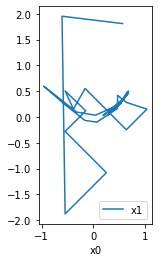

In [10]:
# plot results
ax = X.data.plot(*vocs.variable_names)
ax.set_aspect("equal")

## Visualize model used by upper confidence bound
Models are kept in a list, in this case that list has one element, the model
created for the objective `y1`.


C:\ProgramData\Miniconda3\envs\xopt\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


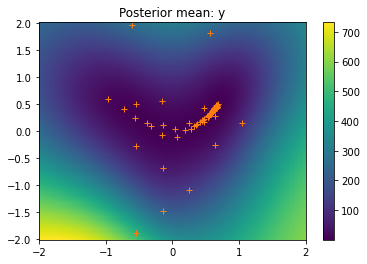

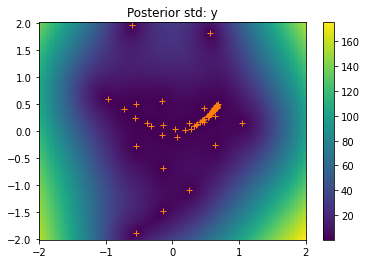

In [11]:
from matplotlib import pyplot as plt  # plot model predictions

data = X.data

bounds = generator.vocs.bounds
model = generator.train_model(generator.data)

# create mesh
n = 200
x = torch.linspace(*bounds.T[0], n)
y = torch.linspace(*bounds.T[1], n)
xx, yy = torch.meshgrid(x, y)
pts = torch.hstack([ele.reshape(-1, 1) for ele in (xx, yy)]).double()

outputs = generator.vocs.output_names
with torch.no_grad():
    post = model.posterior(pts)

    mean = post.mean
    std = torch.sqrt(post.variance)

    fig, ax = plt.subplots()
    ax.plot(*data[vocs.variable_names].to_numpy().T, "+C1")
    c = ax.pcolor(xx, yy, mean.reshape(n, n))
    fig.colorbar(c)
    ax.set_title(f"Posterior mean: {outputs[0]}")

    fig2, ax2 = plt.subplots()
    ax2.plot(*data[vocs.variable_names].to_numpy().T, "+C1")
    c = ax2.pcolor(xx, yy, std.reshape(n, n))
    fig2.colorbar(c)
    ax2.set_title(f"Posterior std: {outputs[0]}")

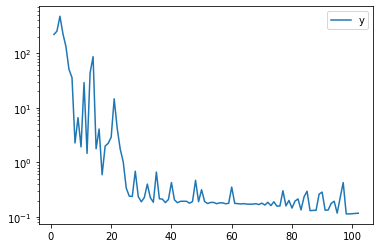

In [12]:
ax = X.data.plot(y="y", logy=True)

In [13]:
# Cleanup
!rm dump.yaml

'rm' is not recognized as an internal or external command,
operable program or batch file.
